In [7]:
# made by Gibeom LEE, HI LAB
# Ìïú Ìè¥Îçî ÎÇ¥ Î™®Îì† csv ÌååÏùºÏùò TENG VppÍ∞íÏùÑ Íµ¨Ìï† Îïå Ïú†Ïö©Ìï©ÎãàÎã§.

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

250619 bopp1_Vpp: 60.33 V


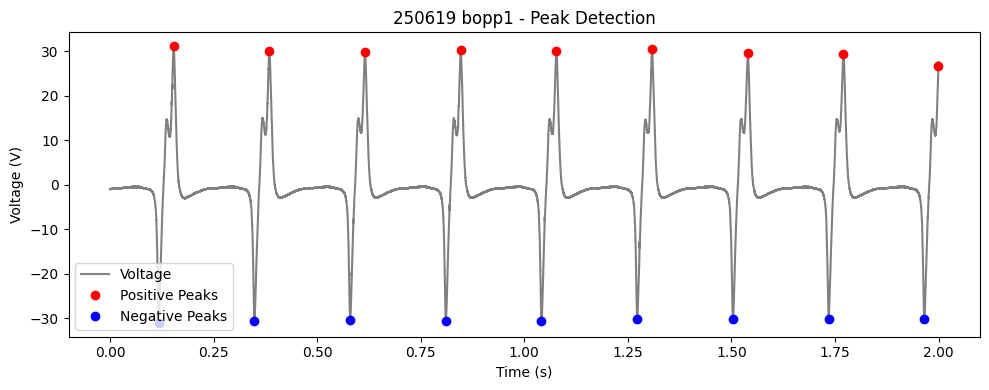

250619 bopp2_Vpp: 48.99 V


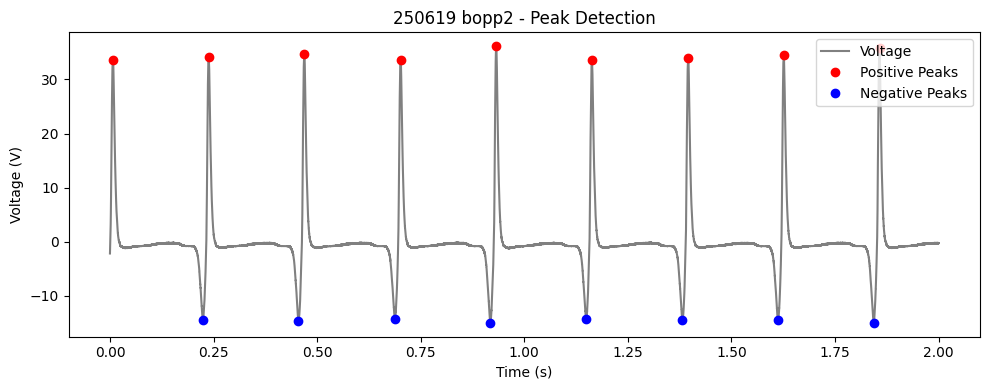

250619 bopp3_Vpp: 99.25 V


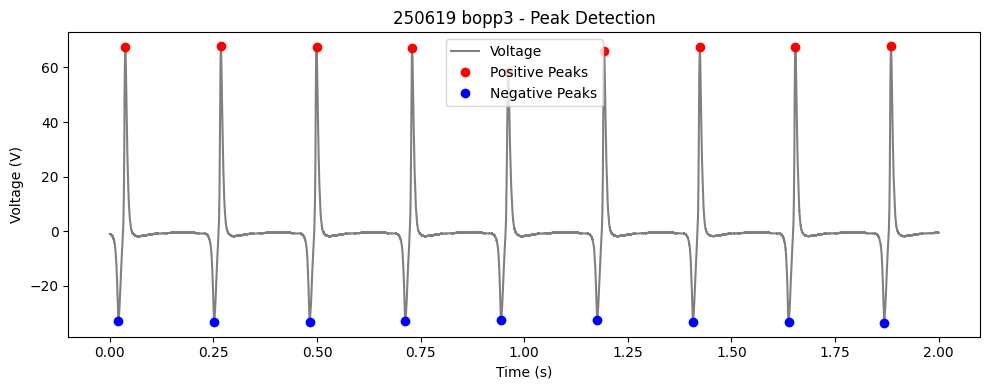

250619 bopp4_Vpp: 76.82 V


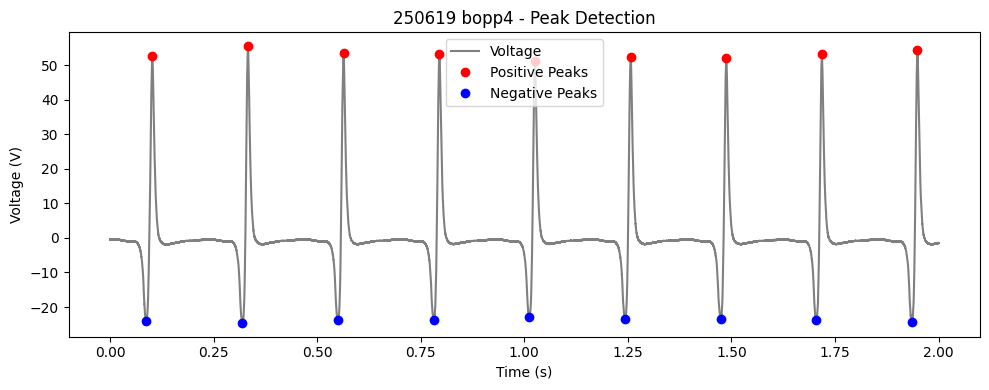

250619 bopp5_Vpp: 85.94 V


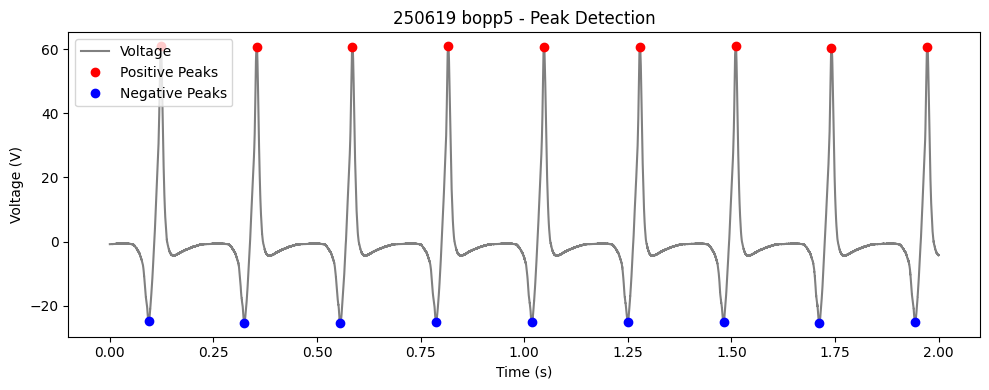


üìä Î™®Îì† ÌååÏùºÏùò ÌèâÍ∑† Vpp Í∞í Î™©Î°ù
250619 bopp1.csv: 60.33 V
250619 bopp2.csv: 48.99 V
250619 bopp3.csv: 99.25 V
250619 bopp4.csv: 76.82 V
250619 bopp5.csv: 85.94 V

üìà Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: 74.27 V
üìâ ÌëúÏ§ÄÌé∏Ï∞® (ÏóêÎü¨Î∞î): 20.00 V


In [52]:
# Ìè¥Îçî Í≤ΩÎ°ú ÏßÄÏ†ï
folder_path = r"C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\1. ionic DC-TENG\0. Ïã§ÌóòÏûêÎ£å\5. Final stage\250619_ÏÜåÏû¨Î≥Ñ Charge pump\bopp"

# find peak height ÏÑ§Ï†ï
height = 0.2
relative_threshold_ratio = 0.2  # ÏµúÎåÄ ÌîºÌÅ¨ ÎåÄÎπÑ ÌïÑÌÑ∞ÎßÅ ÎπÑÏú® (50%)

# Ìè¥Îçî ÎÇ¥ Î™®Îì† CSV ÌååÏùº ÌÉêÏÉâ
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Ï†ÑÏ≤¥ Vpp Ï†ÄÏû• Î¶¨Ïä§Ìä∏
all_vpp_values = []

# Í∞Å ÌååÏùºÎ≥Ñ ÌèâÍ∑† Vpp Í≥ÑÏÇ∞ Î∞è Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        data = pd.read_csv(file_path)

        # ÏãúÍ∞ÑÍ≥º Ï†ÑÏïï Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
        time = data.iloc[:, 0].values
        voltage = data.iloc[:, 1].values

        # + / - ÌîºÌÅ¨ ÌÉêÏßÄ
        pos_peaks, _ = find_peaks(voltage, height=height, distance=2000)
        neg_peaks, _ = find_peaks(-voltage, height=height, distance=2000)

        # ÏµúÎåÄ ÌîºÌÅ¨ Í∏∞Ï§ÄÍ∞í Í≥ÑÏÇ∞
        all_peaks_combined = np.concatenate((pos_peaks, neg_peaks))
        if len(all_peaks_combined) == 0:
            print(f"{file_name}: Ïú†Ìö®Ìïú ÌîºÌÅ¨ ÏóÜÏùå")
            continue

        max_peak_value = np.max(np.abs(voltage[all_peaks_combined]))
        threshold = max_peak_value * relative_threshold_ratio

        # ÏÉÅÎåÄ ÏûÑÍ≥ÑÍ∞í Í∏∞Ï§Ä ÌîºÌÅ¨ ÌïÑÌÑ∞ÎßÅ
        pos_peaks_filtered = [p for p in pos_peaks if abs(voltage[p]) >= threshold]
        neg_peaks_filtered = [p for p in neg_peaks if abs(voltage[p]) >= threshold]

        # Î™®Îì† ÌîºÌÅ¨ ÌÜµÌï© ÌõÑ Ï†ïÎ†¨
        all_peaks = np.sort(np.concatenate((pos_peaks_filtered, neg_peaks_filtered)))

        # Vpp Í≥ÑÏÇ∞
        vpp_list = []
        for i in range(len(all_peaks) - 1):
            start = all_peaks[i]
            end = all_peaks[i + 1]
            if end > start:
                vpp = np.max(voltage[start:end+1]) - np.min(voltage[start:end+1])
                vpp_list.append(vpp)

        mean_vpp = np.mean(vpp_list) if vpp_list else 0
        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")

        # Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏ Ï†ÄÏû•
        all_vpp_values.append(mean_vpp)

        # ÌîºÌÅ¨ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
        plt.figure(figsize=(10, 4))
        plt.plot(time, voltage, label='Voltage', color='gray')
        plt.plot(time[pos_peaks_filtered], voltage[pos_peaks_filtered], 'ro', label='Positive Peaks')
        plt.plot(time[neg_peaks_filtered], voltage[neg_peaks_filtered], 'bo', label='Negative Peaks')
        plt.title(f"{base_name} - Peak Detection")
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{file_name} Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")

# Î™®Îì† Vpp Í≤∞Í≥º Ï∂úÎ†•
print("\n==============================")
print("üìä Î™®Îì† ÌååÏùºÏùò ÌèâÍ∑† Vpp Í∞í Î™©Î°ù")
for i, vpp in enumerate(all_vpp_values):
    print(f"{csv_files[i]}: {vpp:.2f} V")

# Ï†ÑÏ≤¥ ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
if all_vpp_values:
    overall_mean = np.mean(all_vpp_values)
    overall_std = np.std(all_vpp_values, ddof=1)  # sample standard deviation
    print("\n==============================")
    print(f"üìà Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: {overall_mean:.2f} V")
    print(f"üìâ ÌëúÏ§ÄÌé∏Ï∞® (ÏóêÎü¨Î∞î): {overall_std:.2f} V")
else:
    print("üì≠ Vpp Îç∞Ïù¥ÌÑ∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")